In [1]:
# Import required libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the dataset
data = pd.read_csv("mall_customers.csv")

# Data preprocessing
X = data.iloc[:, [2, 4]].values

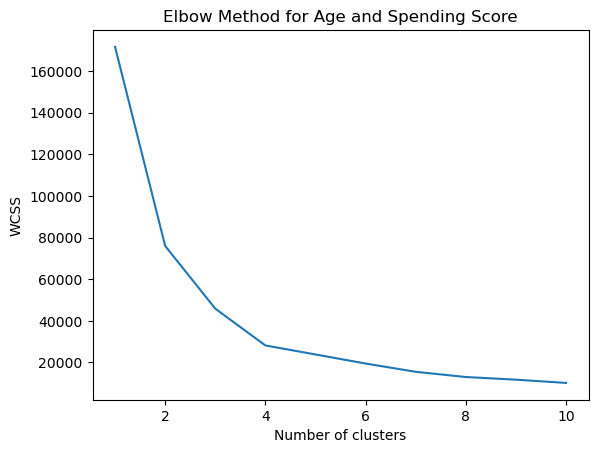

In [2]:
# Decide number of clusters using Elbow Method for Age and Spending Score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Age and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [3]:
# Perform clustering for Age and Spending Score using the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

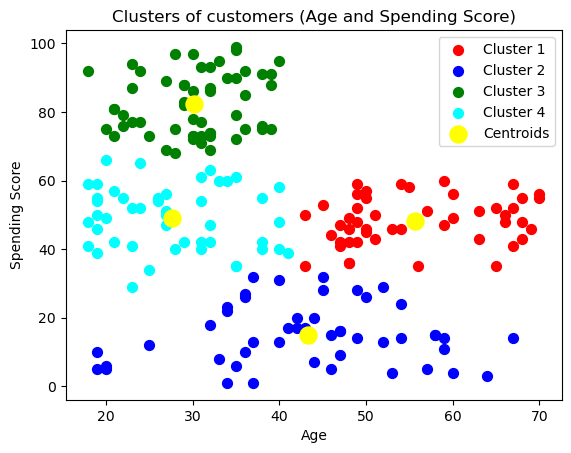

In [7]:
# Visualize the clusters for Age and Spending Score
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='yellow', label='Centroids')
plt.title('Clusters of customers (Age and Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

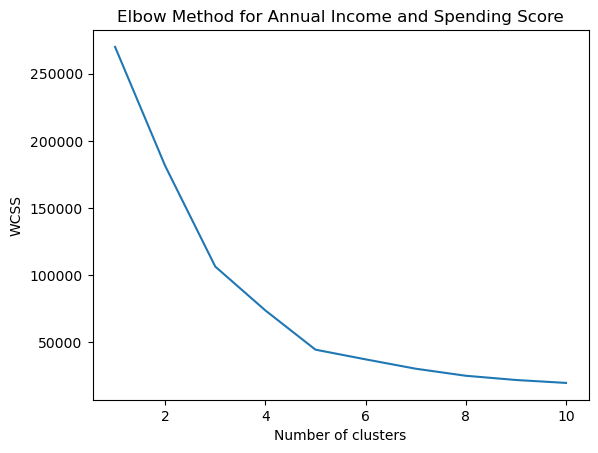

In [8]:
# Decide number of clusters using Elbow Method for Annual Income and Spending Score
X = data.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Annual Income and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Perform clustering for Annual Income and Spending Score using the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

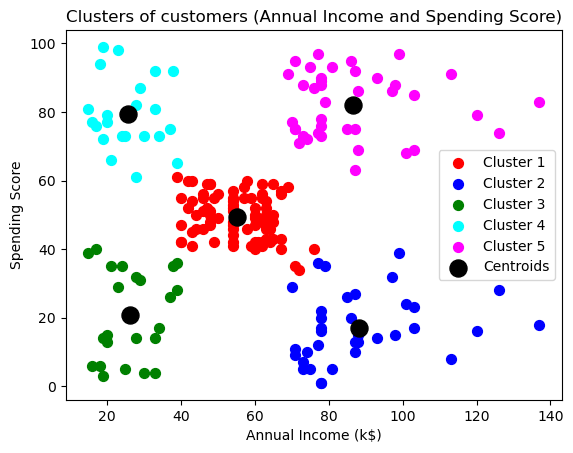

In [10]:
# Visualize the clusters for Annual Income and Spending Score
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label='Centroids')
plt.title('Clusters of customers (Annual Income and Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

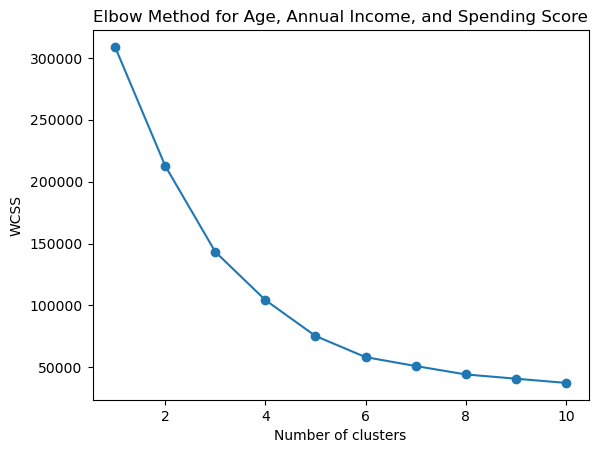

In [11]:
# Decide number of clusters using Elbow Method for Age, Annual Income, and Spending Score
X = data.iloc[:, [2, 3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Age, Annual Income, and Spending Score')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Perform clustering for Age, Annual Income, and Spending Score using the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

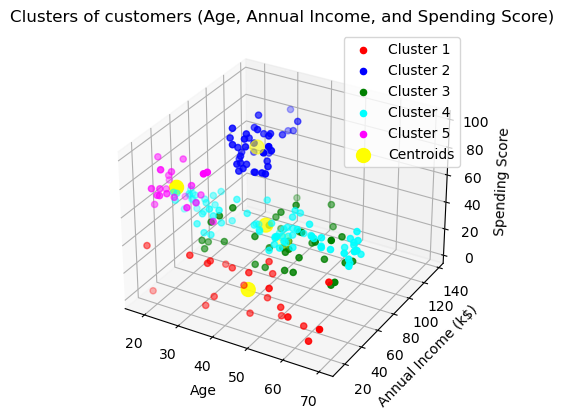

In [13]:
# Visualize the clusters for Age, Annual Income, and Spending Score
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], X[y_pred == 0, 2], c='red', label='Cluster 1')
ax.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], X[y_pred == 1, 2], c='blue', label='Cluster 2')
ax.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], X[y_pred == 2, 2], c='green', label='Cluster 3')
ax.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], X[y_pred == 3, 2], c='cyan', label='Cluster 4')
ax.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], X[y_pred == 4, 2], c='magenta', label='Cluster 5')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='yellow', s=100, label='Centroids')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
plt.title('Clusters of customers (Age, Annual Income, and Spending Score)')
plt.legend()
plt.show()

In [14]:
# Print cluster assignments for Age, Annual Income, and Spending Score
customer_groups = pd.DataFrame({'CustomerID': data['CustomerID'], 'Customer Group': y_pred})
print(customer_groups)

     CustomerID  Customer Group
0             1               0
1             2               4
2             3               0
3             4               4
4             5               0
..          ...             ...
195         196               1
196         197               2
197         198               1
198         199               2
199         200               1

[200 rows x 2 columns]


In [15]:
new_data = pd.read_csv('mall_customers_predict.csv')

In [16]:
X = new_data[[ "Age", "Spending Score (1-100)", "Annual Income (k$)"]].values

In [17]:
# Predict clusters for the new dataset
predicted_clusters = kmeans.predict(X)

In [18]:
predicted_clusters

array([1, 4, 3, 4, 1])

In [19]:
df_result = pd.DataFrame({
    "CustomerID":new_data["CustomerID"],
    "Customer Group":predicted_clusters,
})

df_result.to_excel("mall_customers_prediction.xlsx")